In [57]:
import pandas as pd
from collections import Counter
from functional import get_data, process, clean_df, add_counts, analyze_most_different 

## how gender clues are implied within the contents recommended by Spotify’s recommender systems in terms of the graphical user interface, and the presentation of playlists on the home screen, based on personalized recommendation patterns
</br>

### How are gender ideologies implied within the recommended playlists and their organization on Spotify

### Preparation:
Reading files</br>
Cleaning data

In [197]:
full_male, full_female = get_data()

In [198]:
# Creating subsets from the data to work with
male, female = process(full_male), process(full_female)

In [199]:
len(male), len(female)

(4247, 5014)

In [200]:
# Clean all data by removing trailing whitespaces and lowercasing all letters
female = add_counts(clean_df(female.copy()))
male = add_counts(clean_df(male.copy()))

Now that data is clean, textual analysis can begin

### Simple stats, which are the most common playlists each user received?

In [132]:
len(female[['playlist name', 'playlist count']].drop_duplicates().sort_values(by='playlist count', ascending=False))

443

In [139]:
#x = female[female['type'] == 'playlist']
#x[['playlist name', 'playlist count']].drop_duplicates().sort_values(by='playlist count', ascending=False).to_excel('fem.xlsx')
plotdf['playlist count'].max()

20

251
3775


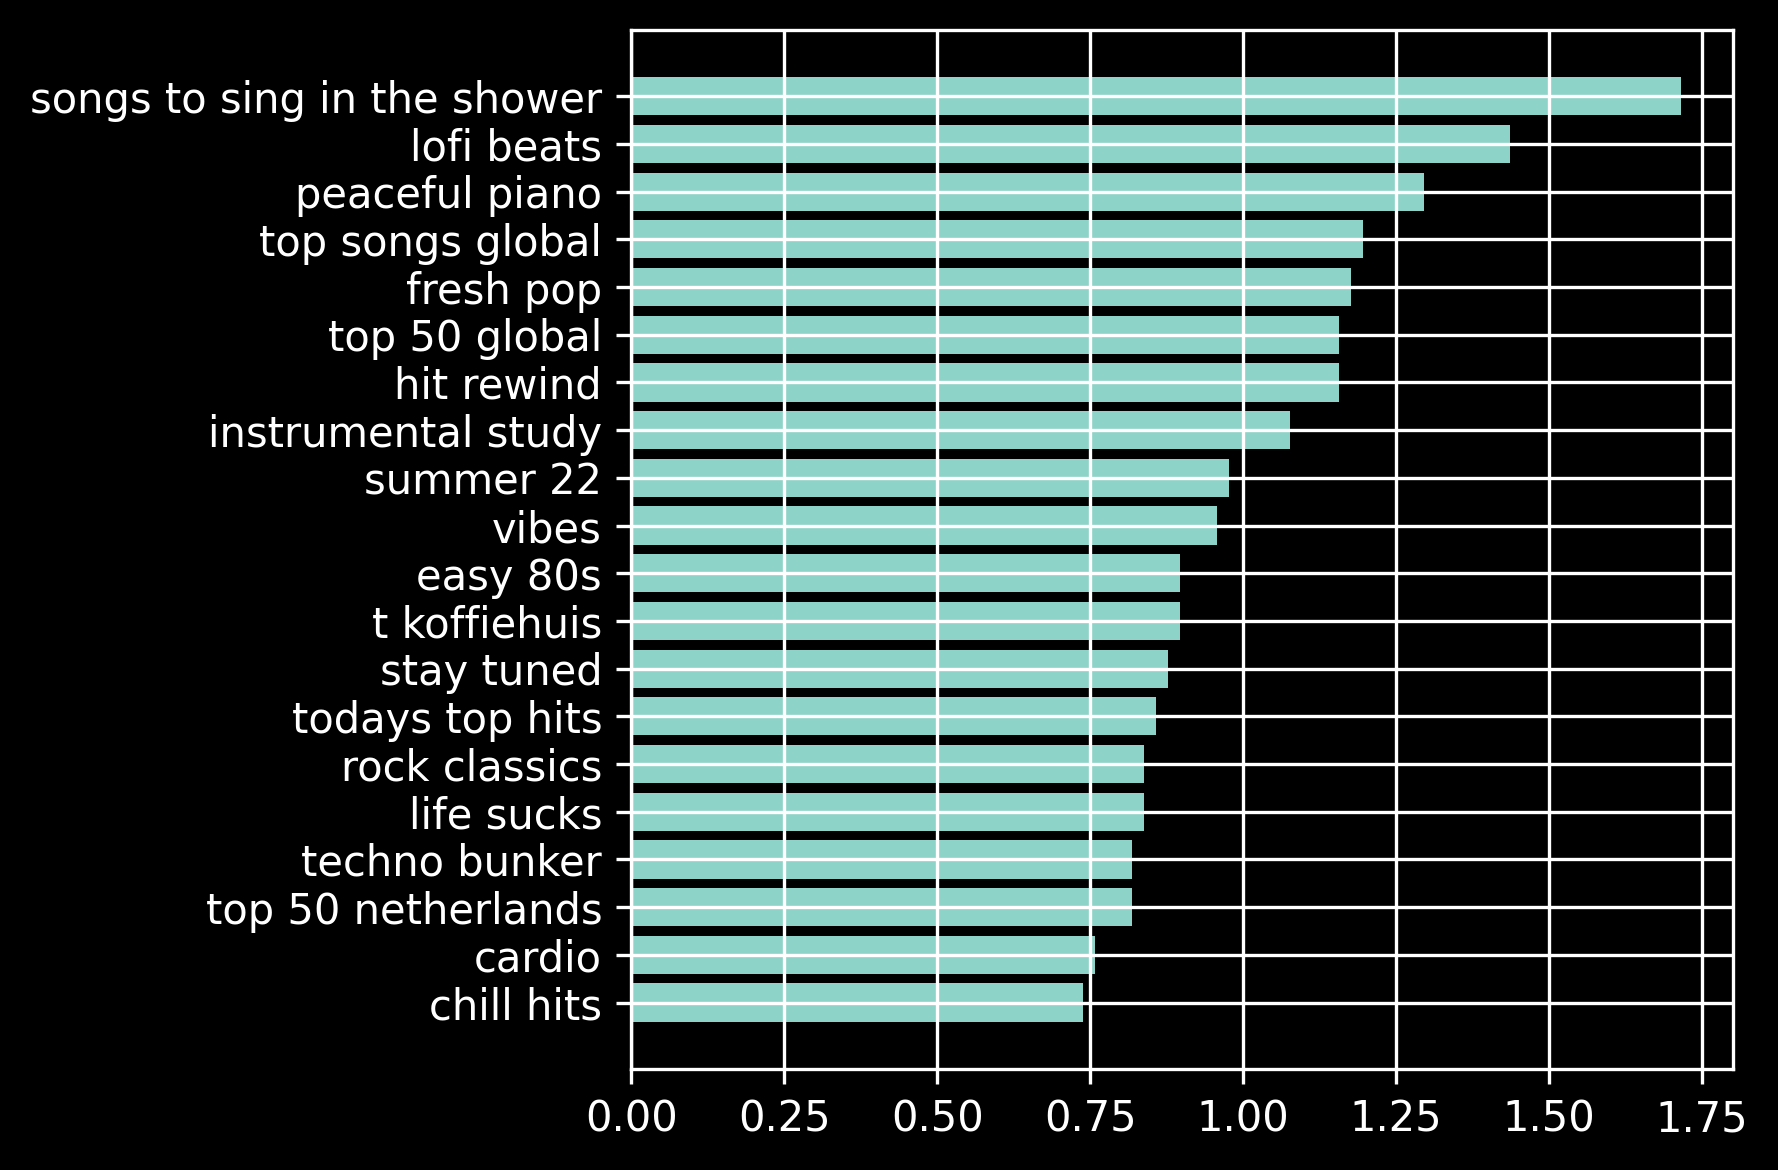

In [201]:
import matplotlib.pyplot as plt

plotdf = female[female['type'] == 'playlist']
plotdf= plotdf[['playlist name', 'playlist count']].drop_duplicates().sort_values(by='playlist count', ascending=False)#.head(20)

print(len(plotdf))
print(sum(plotdf['playlist count']))
plotdf=plotdf.head(20)

plt.figure(dpi=300)
plt.barh(plotdf['playlist name'], (plotdf['playlist count']/len(female))*100)
plt.gca().invert_yaxis()
plt.grid()
plt.tight_layout()
plt.savefig('data/femaletop20.png')
plt.show()

357
3434


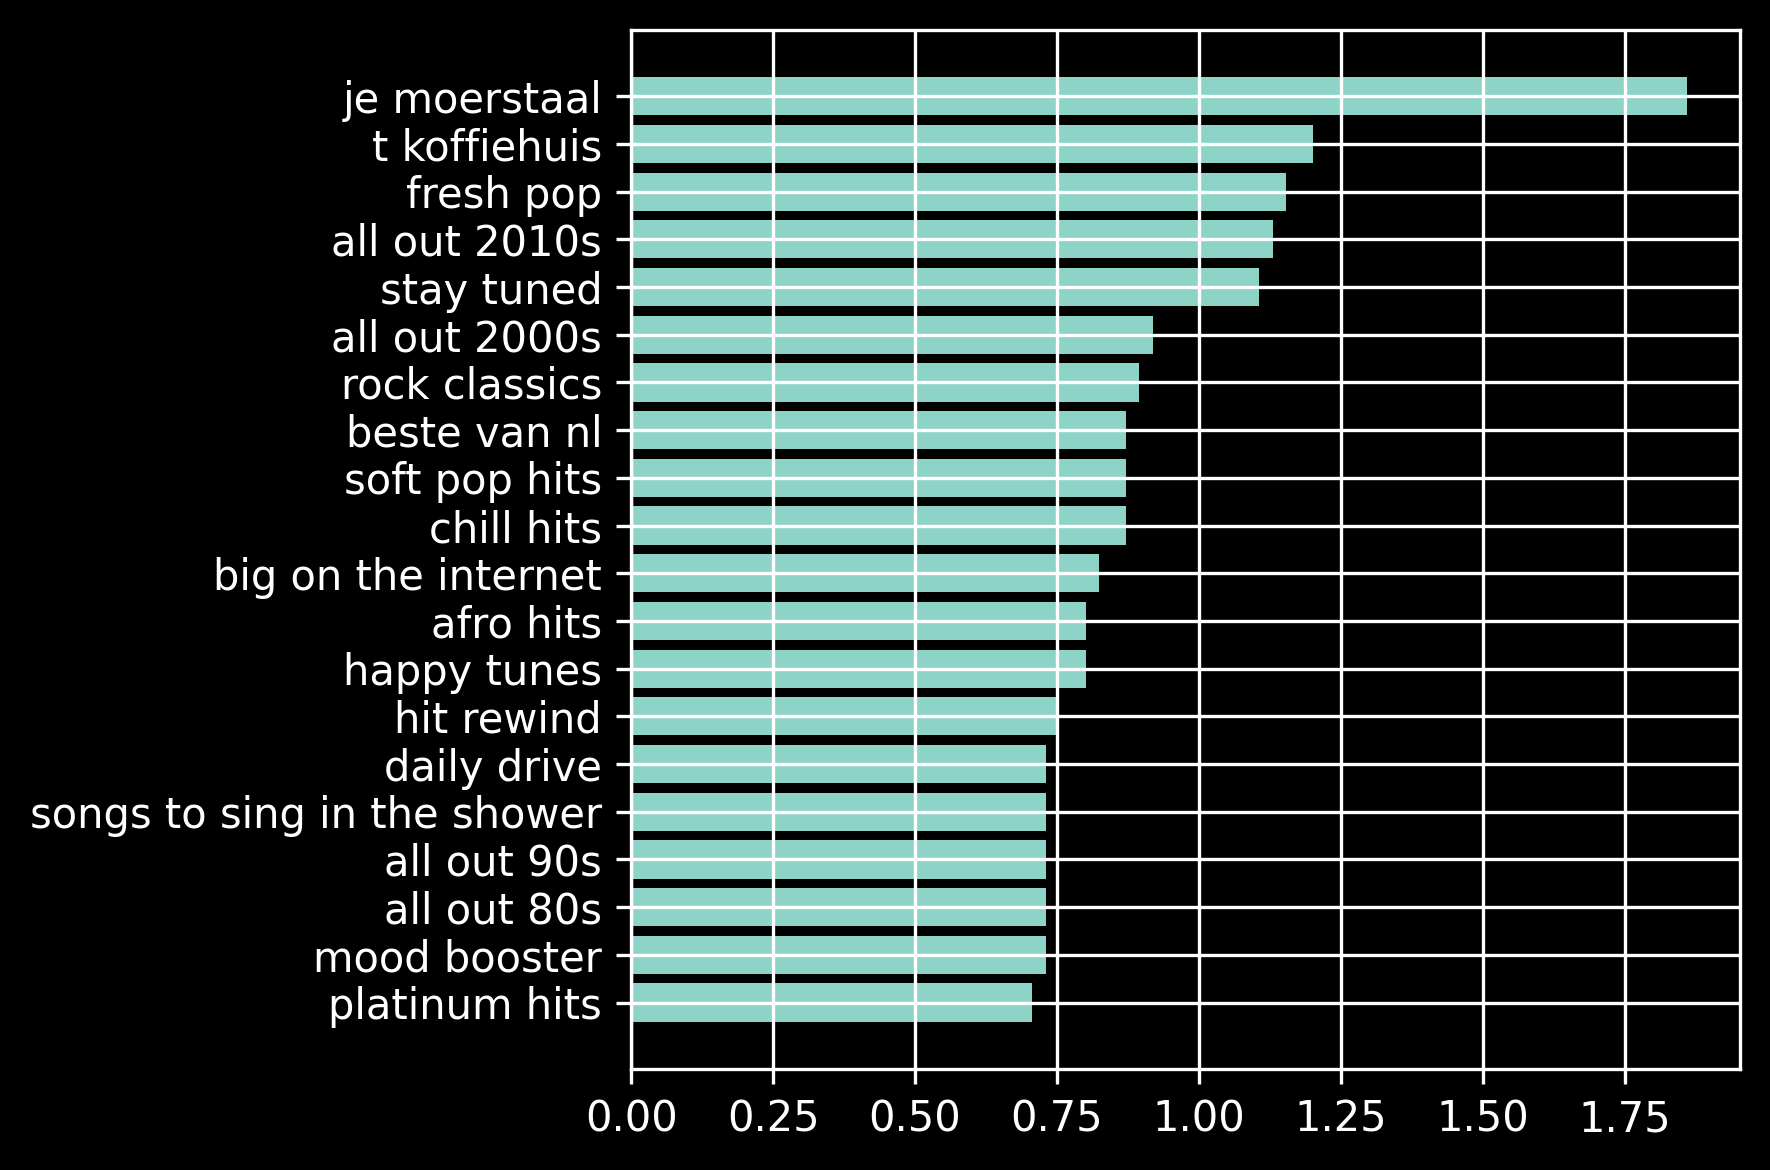

In [202]:
plotdf = male[male['type'] == 'playlist']
plotdf= plotdf[['playlist name', 'playlist count']].drop_duplicates().sort_values(by='playlist count', ascending=False)
print(len(plotdf))
print(sum(plotdf['playlist count']))
plotdf = plotdf.head(20)

plt.figure(dpi=300)
plt.barh(plotdf['playlist name'], (plotdf['playlist count']/len(male))*100)
plt.gca().invert_yaxis()
plt.grid()
plt.tight_layout()

plt.savefig('data/maletop20.png')

plt.show()

In [159]:
female['playlist count']

0       60
1       32
2       58
3       41
4       33
        ..
5009    31
5010    33
5011    32
5012    14
5013    28
Name: playlist count, Length: 5014, dtype: int64

In [183]:
male

,day,time,hub name,playlist name,type,playlist count,hub count
0,2022-04-14,10:00:00,to get you started,taylor swift mix,playlist,5,3
1,2022-04-14,10:00:00,to get you started,bad bunny mix,playlist,5,3
2,2022-04-14,10:00:00,to get you started,bts mix,playlist,5,3
3,2022-04-14,10:00:00,try something else,hot hits,playlist,2,9
4,2022-04-14,10:00:00,try something else,top 50 netherlands,playlist,2,9
...,...,...,...,...,...,...,...
4242,2022-04-20,22:00:00,discover more from pink floyd,soft rock,playlist,20,79
4243,2022-04-20,22:00:00,discover more from pink floyd,pure rock roll,playlist,12,79
4244,2022-04-20,22:00:00,discover more from pink floyd,classic acoustic,playlist,12,79
4245,2022-04-20,22:00:00,discover more from pink floyd,the wall,album,3,79


### Dutch Playlists

In [217]:
dutchm = ['je moerstaal', 'beste van nl', 'woordenschat', 'made in nl', 'beste van woordenschat', '80s beste nltalig', '60s beste nltalig', '70s beste nltalig', 'de jeugd', '00s beste nltalig', '90s beste nltalig', 'de hits uit 2016', 'top 50 netherlands', 'de hits uit 2010', 'de hits uit 2012', 'de hits uit 2019', 'de hits uit 2014', '10s beste nltalig', 'karakter', 'new music friday nl', '10s allerbeste', 'de hits uit 2017', 'equal netherlands', 'de hits uit 2015', 'de hits uit 2013', 'viral 50 netherlands', 'top songs netherlands']
dutchf = ['top songs netherlands', 'top 50 netherlands', 'beste van nl', 'viral 50 netherlands', 'je moerstaal', 'viral hits nl', 'new music friday nl', 'hot hits nl', 'woordenschat', 'zomerhits 20102020', '10s allerbeste', 'de hits uit 2016', 'de hits uit 2019', 'beste van woordenschat', '10s beste nltalig', 'de hits uit 2018']


femc=0
for x in dutchf:
    femc += int(female['playlist count'].loc[female['playlist name'] == x].unique())

mamc=0
for y in dutchm:
    #display(male.loc[male['playlist name'] == y].drop_duplicates())
    mamc += int(male['playlist count'].loc[male['playlist name'] == y].unique())

# Amount of dutch playlists recommended out of all playlists ever recommended
(mamc/len(male.loc[male['type']=='playlist']))*100, (femc/len(female.loc[female['type']=='playlist']))*100


(7.803724504877328, 8.876374363100027)

In [218]:
# Amount of dutch playlists out of all playlists
(len(dutchm)/len(male['playlist name'].loc[male['type']=='playlist'].unique()))*100, (len(dutchf)/len(female['playlist name'].loc[female['type']=='playlist'].unique()))*100

(7.563025210084033, 6.374501992031872)

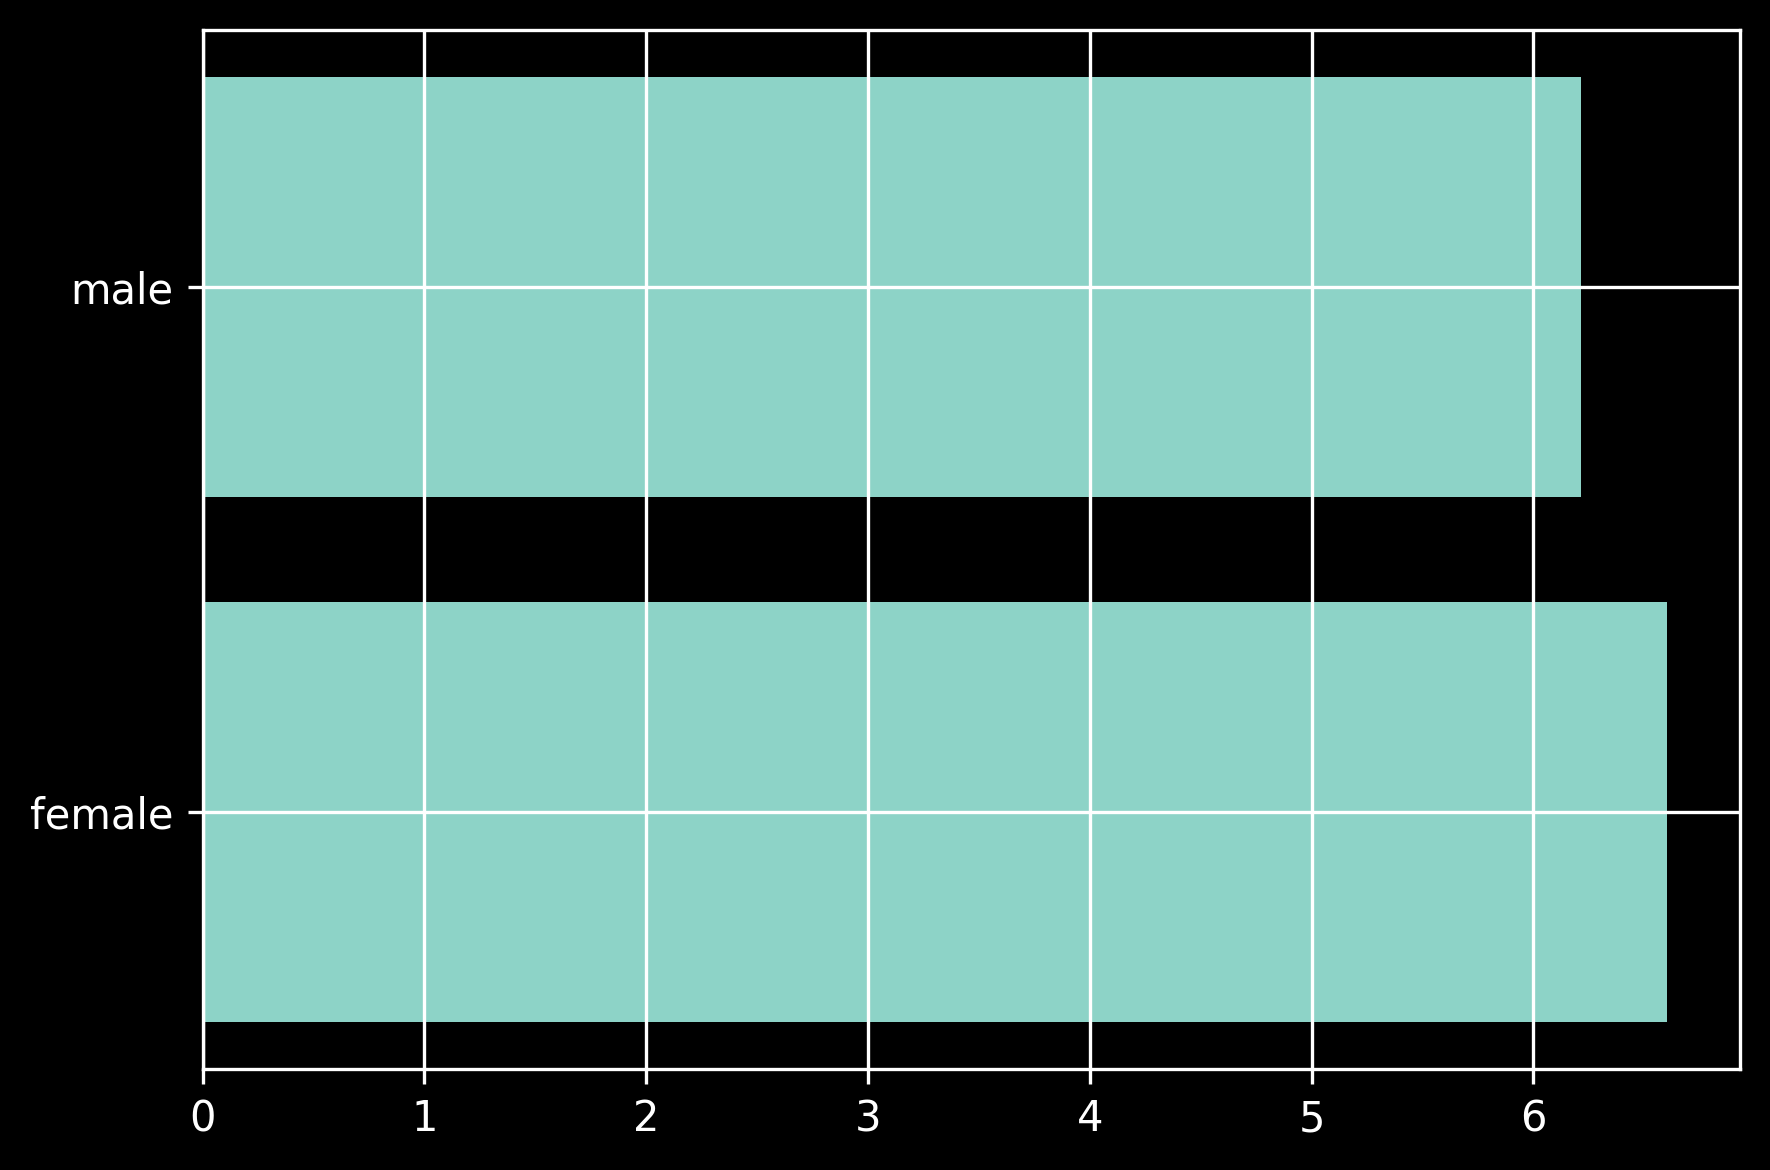

In [207]:
mf = [(mamc/len(male))*100, (femc/len(female))*100]

plt.figure(dpi=300)
plt.barh(['male', 'female'], mf)
plt.gca().invert_yaxis()
plt.grid()
plt.tight_layout()

plt.savefig('data/maletop20.png')

plt.show()

### Similarities:
Find which playlists both users got recommended

In [203]:
# Check which playlists both users have in common
similar_playlists = male[male['playlist name'].isin(female['playlist name'])]
similar_playlists = similar_playlists[similar_playlists.type == 'playlist']
#similar_playlists

In [204]:
# Which playlists only one of both users gets recommended to
diff = pd.concat([male[~male['playlist name'].isin(female['playlist name'])], 
    female[~female['playlist name'].isin(male['playlist name'])]])
diff = diff[diff.type == 'playlist']

### Finding which are the most appearing playlists only one of both users were recommended

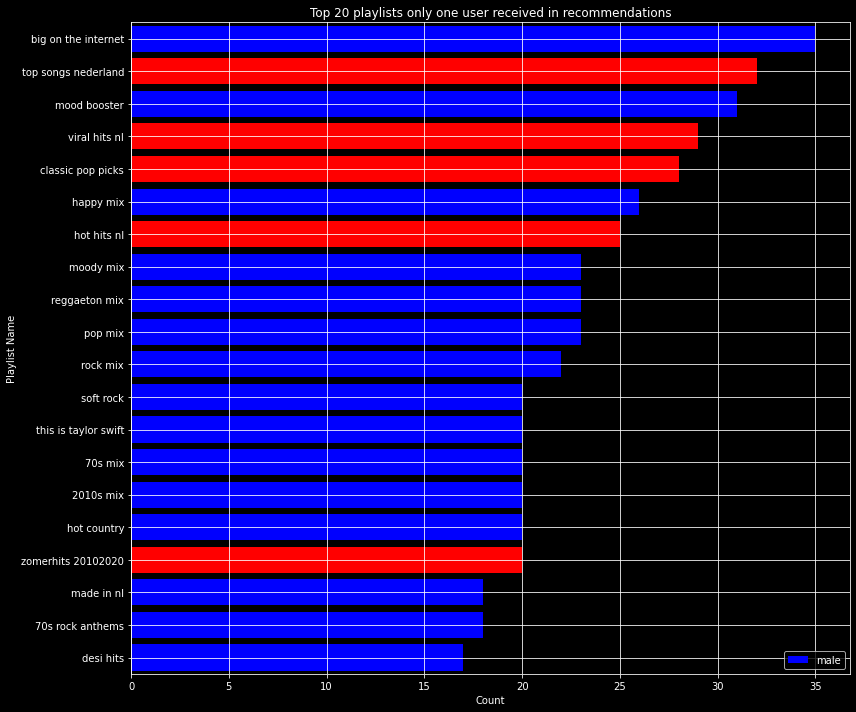

In [205]:
most_different = dict(Counter(diff['playlist name']).most_common(20))
male_unique = male['playlist name'].unique()

analyze_most_different(most_different, male_unique, feature=False)

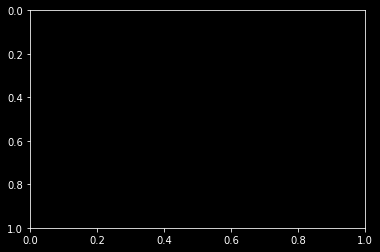

In [69]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource

playlists=list(most_different.keys())
counts = list(most_different.values())
color = ['blue' if x in male_unique else 'red' for x in most_different]

source=ColumnDataSource(dict(playlist=playlists,count=counts, color=color))

p = figure(y_range=playlists, width=400, height=400)

p.hbar(y='playlist', right='count', left=0, height=0.4, color='color', source=source)

plt.gca().invert_yaxis()
       
show(p)

In [122]:
m_playlist = male[male.type == 'playlist']
f_playlist = female[female.type == 'playlist']

In [123]:
'happy mix' in female['playlist name'].unique()

False

In [124]:
# Looking for the most common recommended playlists per user
m = dict(Counter(m_playlist['playlist name']).most_common())
mdf = pd.DataFrame({'male': m.keys(), 'count': m.values()})

f = dict(Counter(f_playlist['playlist name']).most_common())
fdf = pd.DataFrame({'female': f.keys(), 'count': f.values()})

#display(mdf.head(20), fdf.head(20))

In [125]:
simm = dict()

p = similar_playlists['playlist name'].astype(str)
for key, value in m.items():
    if key in p:
        simm[key] = value
        
len(simm)


0

In [ ]:
# https://stackoverflow.com/questions/21319929/how-to-determine-whether-a-pandas-column-contains-a-particular-value
found = df[df['Column'].str.contains('Text_to_search')]
print(found.count())

### Looking for the difference between how often male vs female user received certain playlists

In [126]:
most_common_playlists = {
    'male': dict(Counter(m_playlist['playlist name']).most_common()), 
    'female': dict(Counter(f_playlist['playlist name']).most_common())
}

# Fill all playlists only one user gets recommended
new = pd.DataFrame(most_common_playlists).fillna(0)

# Get difference
new['diff'] = abs(new['male'] - new['female'])

# Sort
new.sort_values(by = 'diff', ascending=False, inplace=True)
new.head(60)

,male,female,diff
lofi beats,11.0,72.0,61.0
top songs global,2.0,60.0,58.0
top 50 global,2.0,58.0,56.0
songs to sing in the shower,30.0,86.0,56.0
peaceful piano,11.0,65.0,54.0
instrumental study,1.0,54.0,53.0
je moerstaal,79.0,33.0,46.0
todays top hits,3.0,43.0,40.0
top 50 netherlands,2.0,41.0,39.0
techno bunker,2.0,41.0,39.0


### Differences in playlist recommendations between both users

In [127]:
# Looking for top playlists both users were recommended that the other user was not
male_count = dict(Counter(m_playlist['playlist name'][~m_playlist['playlist name'].isin(f_playlist['playlist name'])]).most_common())
female_count = dict(Counter(f_playlist['playlist name'][~f_playlist['playlist name'].isin(m_playlist['playlist name'])]).most_common())

display(
pd.DataFrame({'male': male_count.keys(), 'count' : male_count.values()}).head(20),
pd.DataFrame({'female': female_count.keys(), 'count' : female_count.values()}).head(20)
)

,male,count
0,big on the internet,35
1,mood booster,31
2,happy mix,26
3,moody mix,23
4,reggaeton mix,23
5,pop mix,23
6,rock mix,22
7,soft rock,20
8,this is taylor swift,20
9,70s mix,20


,female,count
0,top songs nederland,32
1,viral hits nl,29
2,classic pop picks,28
3,hot hits nl,25
4,zomerhits 20102020,20
5,homework motivation,15
6,singled out,15
7,all new all now,15
8,sing along kpop,14
9,top hits of 2018,14


Tagging times after morning, afternoon and evening

In [80]:
# copy = male.copy()
# copy['time'] = copy.time.astype(str).apply(lambda x: int(x[:2]))

# # Translate the times to dayphases
# for i, time in copy.time.iteritems():
#     if time < 12:
#         copy.iloc[i] = 'morning'
#     elif time >=12<19:
#         copy.iloc[i] = 'afternoon'
#     else:
#         copy.iloc[i] = 'evening'

        

In [ ]:
#male[copy['time'] == 'morning']

In [133]:
# Calculating how many times the woman received dinner hubs
Counter(female['playlist name'][female['hub name'] == 'dinner'])

Counter({'dinner with friends': 6,
         'dinner music': 6,
         'feel good dinner': 6,
         'kitchen swagger': 6,
         'latin dinner': 6,
         'jazzy dinner': 6,
         'bossa nova dinner': 6,
         'the perfect italian dinner': 5,
         'dinner lounge': 6,
         'diner entre amis': 6})

In [106]:
full_female[full_female['hub name'] == 'Dinner'].groupby(['playlist name'])['day','playlist name'].apply(display)

/var/folders/l4/sh91w5z5601c5_zm643js55c0000gn/T/ipykernel_12190/934074971.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  full_female[full_female['hub name'] == 'Dinner'].groupby(['playlist name'])['day','playlist name'].apply(display)


,day,playlist name
1093,2022-04-15,Bossa Nova Dinner
1820,2022-04-16,Bossa Nova Dinner
2590,2022-04-17,Bossa Nova Dinner
3234,2022-04-18,Bossa Nova Dinner
4617,2022-04-20,Bossa Nova Dinner


,day,playlist name
1095,2022-04-15,Dinner Lounge
1821,2022-04-16,Dinner Lounge
2593,2022-04-17,Dinner Lounge
3236,2022-04-18,Dinner Lounge
4619,2022-04-20,Dinner Lounge


,day,playlist name
1088,2022-04-15,Dinner Music
1815,2022-04-16,Dinner Music
2585,2022-04-17,Dinner Music
3228,2022-04-18,Dinner Music
4611,2022-04-20,Dinner Music


,day,playlist name
1096,2022-04-15,Dinner entre amis
1822,2022-04-16,Dinner entre amis
2592,2022-04-17,Dinner entre amis
3235,2022-04-18,Dinner entre amis
4618,2022-04-20,Dinner entre amis


,day,playlist name
1087,2022-04-15,Dinner with Friends
1814,2022-04-16,Dinner with Friends
2584,2022-04-17,Dinner with Friends
3227,2022-04-18,Dinner with Friends
4610,2022-04-20,Dinner with Friends


,day,playlist name
1089,2022-04-15,Feel Good Dinner
1817,2022-04-16,Feel Good Dinner
2586,2022-04-17,Feel Good Dinner
3229,2022-04-18,Feel Good Dinner
4612,2022-04-20,Feel Good Dinner


,day,playlist name
1092,2022-04-15,Jazzy Dinner
1818,2022-04-16,Jazzy Dinner
2588,2022-04-17,Jazzy Dinner
3232,2022-04-18,Jazzy Dinner
4615,2022-04-20,Jazzy Dinner


,day,playlist name
1090,2022-04-15,Kitchen Swagger
1816,2022-04-16,Kitchen Swagger
2587,2022-04-17,Kitchen Swagger
3230,2022-04-18,Kitchen Swagger
4613,2022-04-20,Kitchen Swagger


,day,playlist name
1091,2022-04-15,Latin Dinner
1819,2022-04-16,Latin Dinner
2589,2022-04-17,Latin Dinner
3231,2022-04-18,Latin Dinner
4614,2022-04-20,Latin Dinner


,day,playlist name
1094,2022-04-15,The Perfect Italian Dinner
2591,2022-04-17,The Perfect Italian Dinner
3233,2022-04-18,The Perfect Italian Dinner
4616,2022-04-20,The Perfect Italian Dinner


""


In [ ]:
# Counting workout playlists
display(pd.DataFrame(Counter(female['playlist name'][female['hub name'] == 'workout']).most_common()))
display(pd.DataFrame(Counter(male['playlist name'][male['hub name'] == 'workout']).most_common()))

In [ ]:
print(dict(Counter(male['playlist name'][male['hub name'] == 'mood']).most_common()).keys(),'\n',
dict(Counter(female['playlist name'][female['hub name'] == 'mood']).most_common()).keys())

Differences between how often female vs male received lo-fi beats and life sucks

In [ ]:
print(len(male[male['playlist name'] =='life sucks']), len(female[female['playlist name'] =='life sucks']))
print(len(male[male['playlist name'] =='lofi beats']), len(female[female['playlist name'] =='lofi beats']))

Checking for hub names hinting towards sentiment playlists, ignoring 'more like' or similar playlists as they are targeted towards music discovery for artists, similar playlists or algorithmically generated, sentiment neutral playlists

In [ ]:
female_hubs = list(f_playlist['hub name'])
female_hubs = [e for e in female_hubs if not e.startswith('more like') and not e.startswith('recommended')]
set(female_hubs)

In [ ]:
male_hubs = list(m_playlist['hub name'])
male_hubs = [e for e in male_hubs 
if not e.startswith('more') and 
not e.startswith('recommended') and 
not e.startswith('for fans') and 
not e.startswith('discover') and
not e.endswith('name') and
not e.endswith('albums') and
not e.endswith('charts') and
not e.endswith('artists') and

# no personalized playlists
'you' not in e]

Counter(male_hubs).most_common()

Activity or mood related playlists extracted from here are
'chill,', 'dinner,', 'instrumental,', 'mood,', 'party,', 'singalong,', 'throwback,', 'workout'

In [ ]:
# looking for mood playlists
Counter(f_playlist['playlist name'][f_playlist['hub name'].isin(['mood','vibes'])]).most_common()

Checking how often the user was recommended certain mood playlists

In [ ]:
f_playlist['day'][f_playlist['playlist name'] == 'life sucks']
set(f_playlist['day'][f_playlist['playlist name'] == 'songs to sing in the shower'])

In [ ]:
# Male mood playlists
Counter(male['playlist name'][male['hub name'].isin(['mood','vibes','sad songs','sad vibes','happy'])]).most_common()

### Workout playlists

In [76]:
pd.DataFrame(Counter(male['playlist name'][male['hub name'].isin(['workout'])]).most_common())

,0,1
0,motivation mix,10
1,fun run,10
2,power hour,10
3,run this town,10
4,top hits workout,9
5,beast mode,9
6,power workout,9
7,cardio,9
8,workout,8
9,fast pop run,6


In [77]:
pd.DataFrame(Counter(female['playlist name'][female['hub name'].isin(['workout'])]).most_common())

,0,1
0,power hour,32
1,top hits workout,31
2,beast mode,31
3,fun run,31
4,motivation mix,31
5,workout,31
6,cardio,31
7,run this town,31
8,power workout,29
9,yoga meditation,15
